# Projeto Prático Perceptron Rosenblatt

Neste projeto prático, o objetivo é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado
do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

## Equipe:

1. Afonso Henrique Torres Lucas | ifonso.developer@gmail.com | iFonso - 2215080047
2. Erik Gustavo Lima de Oliveira | erik.exatas10@gmail.com | ErikExatas - 2115080049
3. David Augusto De Oliveira E Silva | david-augusto-silva - 2115080006
4. Lilian Iazzai De Souza Oliveira | lilianiazzai@gmail.com | lilianiazzai - 2215080018
5. Vitor Nascimento Aguiar | Vtaguiar1909 - 2115080055

In [1]:
# identificador do arquivo
id = (7+9+6+8+5)%4
print(id)

3


In [2]:
# Bibliotecas
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns
from prettytable import PrettyTable

# Módulos
from modules.perceptron import Perceptron
import prettytable

In [3]:
with open('./data/dataAll.txt', 'rb') as f:
    data = f.read()

In [4]:
def get_ndarray_from_file(filename: str) -> np.ndarray:
    """Formato dos dados -> (m, 1, 3) : [[[x_1, x_2, y_d]], ...]"""
    return np.squeeze(np.fromfile(filename, dtype=np.float64).reshape(-1, 1, 3))

In [5]:
def split_data(data: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Faz split do dataset -> (m, 2), (m, 1)"""
    return data[:, :2], data[:, 2].reshape(-1, 1)

In [6]:
data = get_ndarray_from_file(f"./data/dataAll.txt")
X, y = split_data(data)

print(f"data: {data.shape} -> {data[0]}")
print(f"X: {X.shape} | y: {y.shape}")

data: (1000, 3) -> [-363.7884  244.1423    0.    ]
X: (1000, 2) | y: (1000, 1)


## Parte I - Problema Linearmente Separável

Treinando um neurônio perceptron usando `dataAll.txt`, para resolver o problema proposto. O neurônio foi treinado usando os seguintes parâmetros:
- Função de ativação degrau, com limiar zero: $\theta = 0$;
- Taxa de aprendizado: $\eta = 0.1$
- Cada peso deve satisfazer $w_i \sim \mathcal{U}(-0.5,\ +0.5)$

In [7]:
data = get_ndarray_from_file(f"./data/dataAll.txt")
X1, y1 = split_data(data)

print(f"Tamanho da amosta: {data.shape}")

Tamanho da amosta: (1000, 3)


In [8]:
d_interval = (-0.5, 0.5)
perceptron = Perceptron(X1.shape[1], d_interval)

print(f"Pesos iniciais: {perceptron.weights}")

Pesos iniciais: [ 0.24378649 -0.24354164 -0.10152638]


In [9]:
epochs, adjusts = perceptron.train(X1, y1, learning_rate=0.1)

print(f"Total de ajustes: {adjusts}")
print(f"Épocas até a convergência: {epochs}")

Total de ajustes: 921
Épocas até a convergência: 5


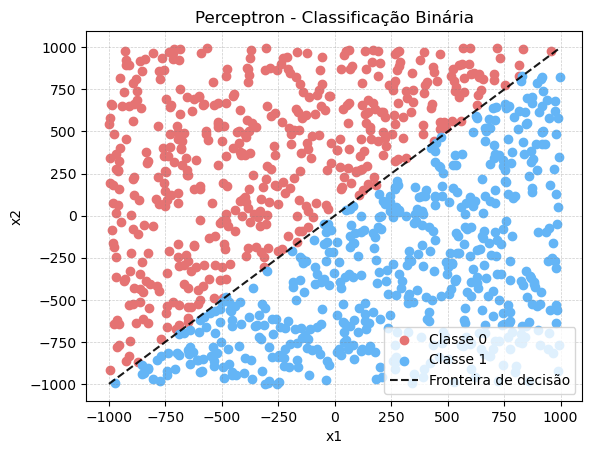

In [10]:
classe_0 = X[y.ravel() == 0]
classe_1 = X[y.ravel() == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='#E57373', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='#64B5F6', label='Classe 1')

w = perceptron.weights
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', linestyle='--', alpha=0.9, label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.5, color='gray')
plt.show()

## Parte II - Experimentação

Nesta parte, as equipes usarão o seu identificador para trabalhar com um arquivo específico, portanto usaremos o arquivo `data3.txt`. Aproveitando o algoritmo construído na parte I, serão executadas 10 repetições deste para seguintes configurações:

$\eta \times I = \{0.4, 0.1, 0.01\} \times \{(-100, +100), (-0.5, +0.5)\}$

I é o intervalo utilizado para distribuição uniforme do valor dos pesos. No total, serão feitas 60 execuções: 10 execuções para cada uma das 6 configurações.

In [11]:
data = get_ndarray_from_file(f"./data/data{id}.txt")
X2, y2 = split_data(data)

print(f"Tamanho da amosta: {data.shape}")

Tamanho da amosta: (600, 3)


In [12]:
intervals = ((-0.5, 0.5), (-100, 100))
learning_rates = (0.4, 0.1, 0.01)

In [13]:
tabela = PrettyTable([
    "Taxa de aprendizado",
    "Intervalo de Pesos",
    "Quantidade de Ajustes",
    "Menor número de épocas para convergência"
])

for interval in intervals:
    for l in learning_rates:
        epochs = []
        adjustments = []

        for _ in range(10):
            p1 = Perceptron(X2.shape[1], interval)
            e, a = p1.train(X2, y2, l)
            epochs.append(e)
            adjustments.append(a)

        avg = np.average(adjustments)
        std_dev = np.std(adjustments)

        converged_epochs = [ep for ep in epochs if ep != -1]
        min_epochs = min(converged_epochs) if converged_epochs else "N/A"

        tabela.add_row([
            f"{l}",
            f"{interval[0]}, {interval[1]}",
            f"{avg:.1f} ± {std_dev:.1f}",
            f"{min_epochs}"
        ])

In [14]:
tabela

Taxa de aprendizado,Intervalo de Pesos,Quantidade de Ajustes,Menor número de épocas para convergência
0.4,"-0.5, 0.5",816.7 ± 115.8,4
0.1,"-0.5, 0.5",778.4 ± 120.2,3
0.01,"-0.5, 0.5",814.0 ± 251.3,3
0.4,"-100, 100",753.3 ± 431.3,2
0.1,"-100, 100",1210.8 ± 766.9,2
0.01,"-100, 100",11261.5 ± 3519.6,43


## Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [15]:
data = get_ndarray_from_file(f"./data/dataHoldout.txt")
X3, y3 = split_data(data)

p3 = Perceptron(input_size=2)
e, adj = p3.train(X=X3, labels=y3, learning_rate=0.1, max_epochs=100)

print(f"O perceptron {"não convergiu" if e < 0 else f"convergiu com {e} épocas"}.")
print(f"Foram feitos um total de {adj} ajustes.")

O perceptron não convergiu.
Foram feitos um total de 3710 ajustes.


### Gráfico para avaliação visual de que o problema não é linearmente separável

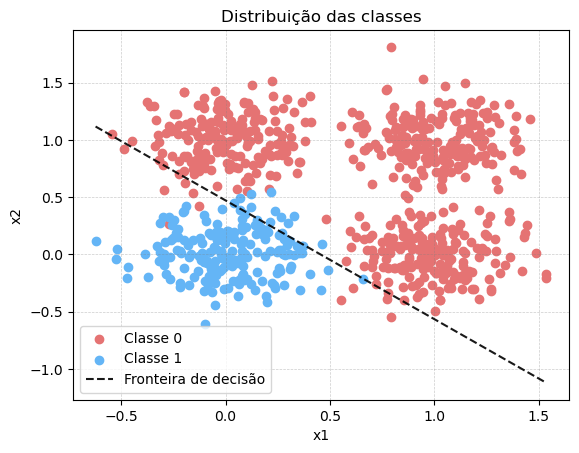

In [23]:
classe_0 = X3[y3.ravel() == 0]
classe_1 = X3[y3.ravel() == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='#E57373', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='#64B5F6', label='Classe 1')

w = p3.weights
x_vals = np.linspace(np.min(X3[:, 0]), np.max(X3[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', linestyle='--', alpha=0.9, label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Distribuição das classes')
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [17]:
# Separa as partes de treino e de teste com base no tamanho de treino

def train_test_split(data: np.ndarray, train_size:float) -> tuple[np.ndarray, np.ndarray, np.ndarray,np.ndarray]:
    np.random.seed(id)
    random_dataset = data[np.random.permutation(len(data))]
    bound = int(len(data)*train_size)
    return random_dataset[:bound, :2], random_dataset[bound:, :2],random_dataset[:bound,2].reshape(-1, 1), random_dataset[bound:,2].reshape(-1, 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, train_size=0.7)

In [19]:
# Executando o treino por 100 épocas e imprimindo os pesos
for i in range(1, 101):
    perceptron.train(X_train, y_train, learning_rate=0.1, max_epochs=1)
    print(f"Época {i:>3} -> {perceptron.weights}")

Época   1 -> [-7.65621351e+00  2.67281518e+04 -2.67827629e+04]
Época   2 -> [-2.07562135e+01  2.67060282e+04 -2.67871845e+04]
Época   3 -> [   -33.75621351  26683.99745986 -26791.5135667 ]
Época   4 -> [   -46.75621351  26661.96671886 -26795.8426673 ]
Época   5 -> [   -59.75621351  26639.93597785 -26800.17176791]
Época   6 -> [   -72.65621351  26618.03064644 -26804.37636734]
Época   7 -> [   -85.55621351  26596.12531503 -26808.58096677]
Época   8 -> [   -98.45621351  26574.21998362 -26812.7855662 ]
Época   9 -> [  -111.35621351  26552.31465222 -26816.99016563]
Época  10 -> [  -124.25621351  26530.40932081 -26821.19476507]
Época  11 -> [  -137.15621351  26508.5039894  -26825.3993645 ]
Época  12 -> [  -149.95621351  26486.61895835 -26829.58436857]
Época  13 -> [  -162.75621351  26464.73392731 -26833.76937264]
Época  14 -> [  -175.55621351  26442.84889627 -26837.95437672]
Época  15 -> [  -188.25621351  26420.95865127 -26842.14514899]
Época  16 -> [  -200.95621351  26399.06840628 -26846.33

### Matriz de Confusão

In [20]:
# Gerar previsões (1 amostra por vez) 
y_pred = [p3.predict(x) for x in X_test]

# Matriz de confusão
cm = skm.confusion_matrix(y_test, y_pred)

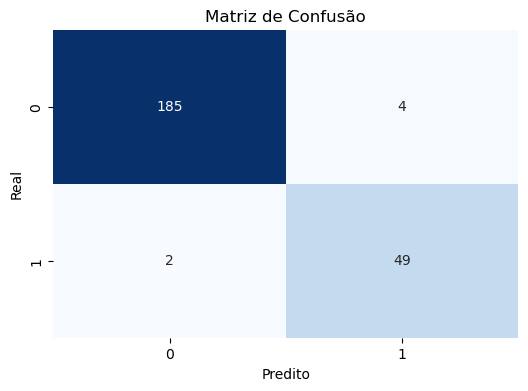

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### Métricas do modelo

In [27]:
# Relatório detalhado (acurácia, precisão, recall, F1)
rep = skm.classification_report(y_test, y_pred, digits=4)
acc = skm.accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {acc:.4f}\n")
print(f"Relatório de Classificação:\n\n{rep}")

Acurácia do modelo: 0.9750

Relatório de Classificação:

              precision    recall  f1-score   support

         0.0     0.9893    0.9788    0.9840       189
         1.0     0.9245    0.9608    0.9423        51

    accuracy                         0.9750       240
   macro avg     0.9569    0.9698    0.9632       240
weighted avg     0.9755    0.9750    0.9752       240



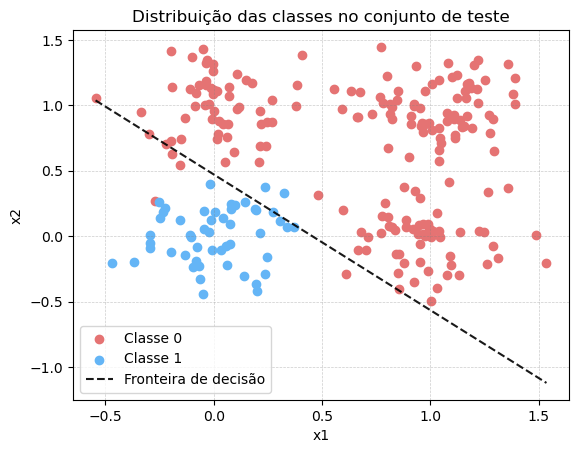

In [26]:
y_test_flat = y_test.ravel()

classe_0 = X_test[y_test_flat == 0]
classe_1 = X_test[y_test_flat == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='#E57373', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='#64B5F6', label='Classe 1')

w = p3.weights
x_vals = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]

plt.plot(x_vals, y_vals, color='black', linestyle='--', alpha=0.9, label='Fronteira de decisão')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribuição das classes no conjunto de teste')
plt.legend()
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.5, color='gray')
plt.show()